In [4]:
from BDD import *

a = BDD('a', ZERO, ONE)
b = BDD('b', ZERO, ONE)

c = a.land(b)
d = a.lor(b)




In [5]:
plotbdd(c)

def testC(a, b):
    return (a and b)
    
[(a, b, testC(a,b)) for a in [False, True] for b in [False, True]]

FileNotFoundError: [WinError 2] "dot.exe" not found in path.

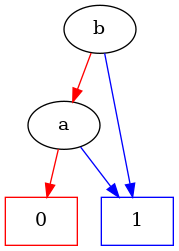

[(False, False, False),
 (False, True, False),
 (True, False, False),
 (True, True, True)]

In [3]:
plotbdd(d)

def testD(a, b):
    return (a and b)
    
[(a, b, testD(a,b)) for a in [False, True] for b in [False, True]]

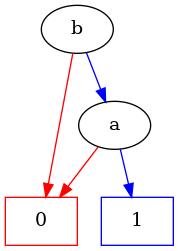

[(False, False, False),
 (False, True, False),
 (True, False, False),
 (True, True, True)]

In [4]:
e = d.land(c)
plotbdd(e)

def testE(a, b):
    return (a and b) and (a or b)
    
[(a, b, testE(a,b)) for a in [False, True] for b in [False, True]]

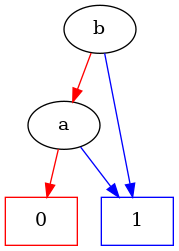

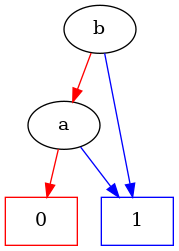

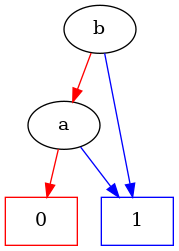

In [9]:
f = d.land(c.negate())

plotbdd(d)
plotbdd(c.negate())

plotbdd(f)

In [6]:
plotbdd(e.simplify())

RecursionError: maximum recursion depth exceeded in comparison